<a href="https://colab.research.google.com/github/orannahum/DBSCAN_clustering/blob/main/DBSCAN_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib


In [174]:


# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [175]:
# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1200))
df=df.append(PointsInCircum(300,800))
df=df.append(PointsInCircum(100,300))
df=df.append(PointsInCircum(700,1800))


# Adding noise to the dataset
df=df.append([(np.random.randint(-800,800),np.random.randint(-800,800)) for i in range(700)])

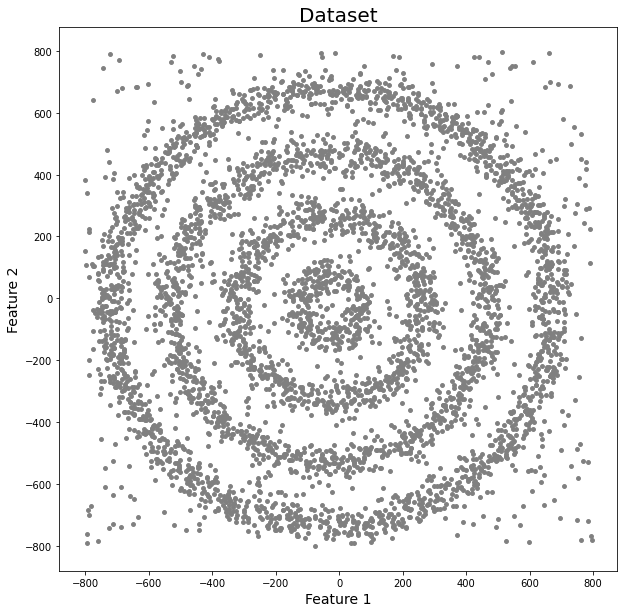

In [176]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [177]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[[0,1]])

DBSCAN()

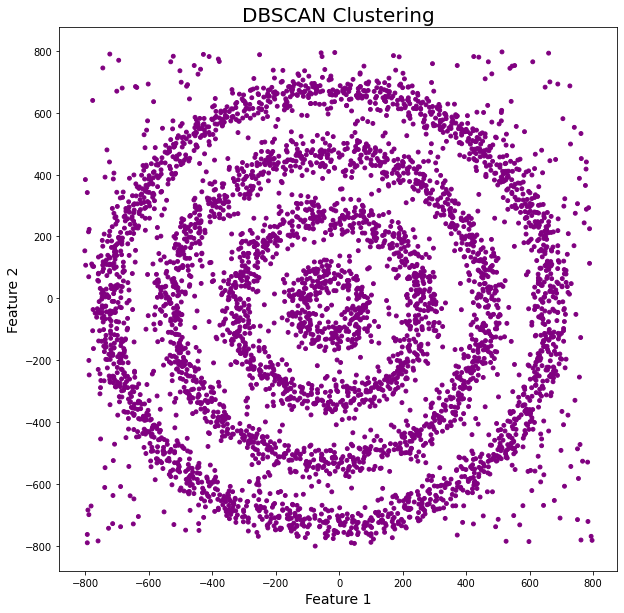

In [178]:
df['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [179]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

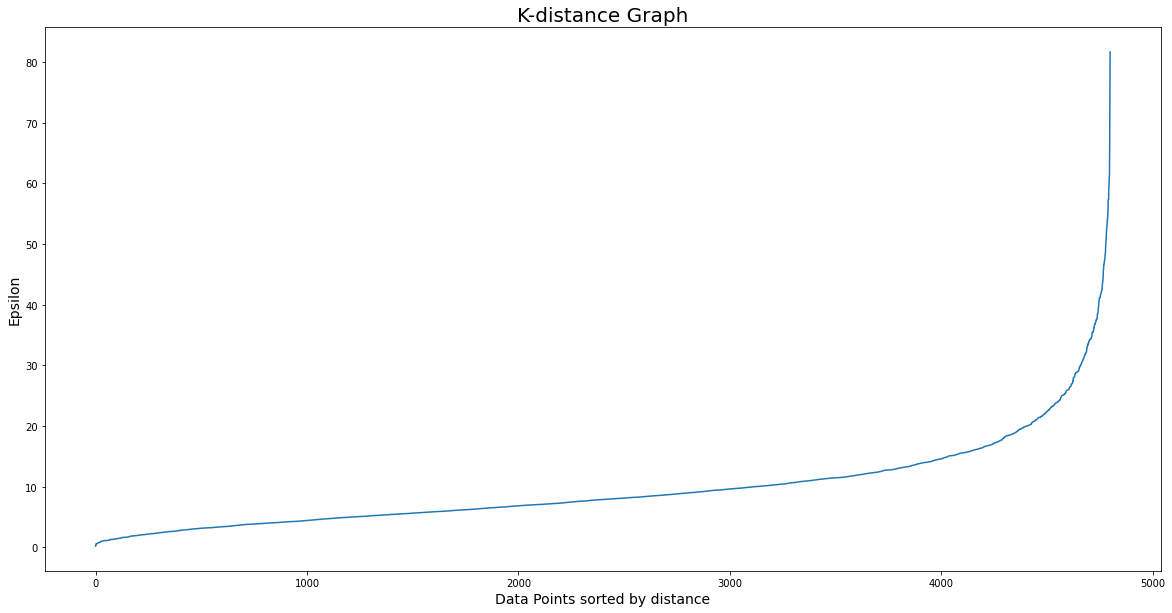

In [180]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()


In [181]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=33,min_samples=6)
dbscan_opt.fit(df[[0,1]])

DBSCAN(eps=33, min_samples=6)

In [182]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 3    1974
 0    1327
 1     869
 2     325
-1     305
Name: DBSCAN_opt_labels, dtype: int64

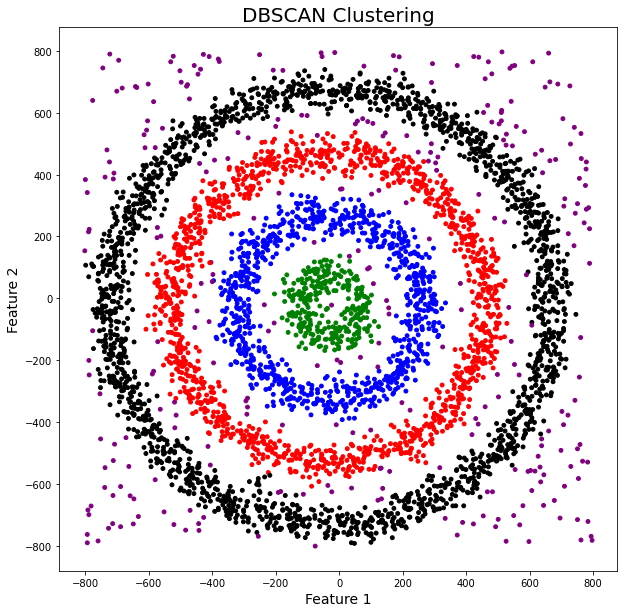

In [183]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
colors=['purple','red','blue','green','black']

plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()